## Makes a Dataframe from the PPMI Big CpG dataframe with just 335 CpGs
## and only Healthy Controls, and adds age and PATNO and transforms
### Dan Cox 2/21

In [38]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

In [39]:
import csv
import random

Files needed:    
* keycpgs.csv (CpGs from Horvath et al 2013)
* beta_post_Funnorm_PPMI_EPICn524final030618.csv  (Giant CpG datafile, 8 GB)
* Patient_Status.csv (Links PATNO with status, that is if healthy Control or not)
* PPMI_Meth_n524_for_LONI030718.txt (Links PATNO to Sentrix ID and Sentrix Position number)
* PPMI_Original_Cohort_BL_to_Year_5_Dataset_Apr2020.csv (Links PATNO and Age)

In [40]:
# Function to find the length of a CSV file
def find_csv_length(file_to_read):
    '''
    Takes an input csv file and returns the number or rows skipping the header.
    '''
    with open(file_to_read, 'r') as file_in:

        csv_in = csv.reader(file_in)

        next(csv_in)
        
        i = 0
        for line in csv_in:
            i+=1
        
    return i
            

In [41]:
#Function to select only certain rows of a CSV file as its read in
def select_rows_in(file_to_read, file_to_write, rows):
    '''
    Takes an input csv file and writes a smaller csv file containing
    only the rows in the list rows. 
    
    params: 
        file_to_read (string) (file.csv) path to some existing csv file to read
        file_to_write (string) (file.csv) path to csv file to write as output
        rows (list) list of rows index values to indicate which rows to keep

    '''
    with open(file_to_read, 'r') as file_in:

        csv_in = csv.reader(file_in)

        header = next(csv_in)
        
        count = 0  
        with open(file_to_write, 'w') as file_out:

            csv_out = csv.writer(file_out)
            csv_out.writerow(header)
                         
            for line in csv_in:
                if line[0] in rows:
                    csv_out.writerow(line)
                    count+=1
                    
                        
    print(f'A file named {file_to_write} has been created with {count} rows.')
          

In [42]:
# I have created a file keycpgs.csv that lists all the CpG sites from Horvath et al 2013,
# that they found most important, 335 in all.

# Reading into a dataframe the CpG values to keep from Horvath 2013 
# supplemental file 3,  335 CpGs correlated with aging 
df_335 = pd.read_csv('keycpgs.csv')
keep = list(df_335.CpGMarker) # make list oif CpGs to keep

In [43]:
# Select out the 335 rows of interest from > 850, 000 rows of giant CpG file
select_rows_in('beta_post_Funnorm_PPMI_EPICn524final030618.csv',  'beta_post_kept.csv', rows=keep)

A file named beta_post_kept.csv has been created with 335 rows.


In [83]:
# Read back in data now with just 335 rows
df_beta_keep = pd.read_csv('beta_post_kept.csv')
df_beta_keep

,200973410159_R03C01,200991620021_R01C01,200991620021_R03C01,200989060105_R03C01,200989060135_R07C01,200989060162_R04C01,200973410167_R04C01,200973410143_R01C01,200973410143_R06C01,200973410167_R05C01,200973410167_R08C01,200989060001_R06C01,200989060130_R01C01,201004820204_R02C01,200973410121_R04C01,201004820204_R01C01,201004820204_R07C01,200989060051_R05C01,200973410159_R07C01,200989060143_R08C01,200989060061_R07C01,200973410144_R07C01,200989060002_R01C01,201004820064_R05C01,201004820067_R08C01,201050360014_R02C01,200989060162_R02C01,200989060162_R01C01,200973410159_R02C01,200991620021_R05C01,201050360065_R07C01,201050360065_R08C01,200989060105_R05C01,200989060135_R04C01,200989060135_R01C01,200989060135_R06C01,200989060152_R03C01,200989060152_R06C01,200989060140_R08C01,200989060018_R03C01,200989060088_R03C01,200989060130_R03C01,200989060140_R07C01,200989060104_R03C01,200989060149_R05C01,200989060076_R05C01,200989060076_R06C01,200989060019_R08C01,200989060051_R03C01,200989060063_R08C01,...,200991620029_R02C01,200989060128_R06C01,200991620011_R05C01,200989060063_R01C01,200973410144_R05C01,200989060051_R02C01,201050360013_R02C01,201004820182_R04C01,200989060059_R03C01,201004820182_R02C01,200989060002_R07C01,200989060002_R06C01,200989060059_R02C01,200989060002_R05C01,201050360013_R03C01,200989060002_R08C01,200989060002_R04C01,201004820064_R03C01,201004820064_R02C01,200989060016_R01C01,200989060155_R04C01,200989060016_R03C01,201004820067_R01C01,201050360080_R01C01,200989060015_R06C01,201004820067_R03C01,200989060015_R05C01,200989060155_R02C01,201004820067_R02C01,201004820064_R01C01,200989060016_R02C01,200989060155_R01C01,200989060155_R03C01,200989060111_R02C01,200989060089_R05C01,200989060089_R08C01,200973410143_R03C01,200989060089_R06C01,200973410143_R02C01,200989060089_R07C01,200989060089_R02C01,200989060089_R01C01,200989060089_R04C01,200973410143_R08C01,200973410143_R07C01,200989060089_R03C01,200989060150_R04C01,200989060150_R05C01,200989060150_R06C01,200991620049_R08C01
cg13319175,0.916345,0.876005,0.881291,0.899211,0.867874,0.897708,0.871227,0.865747,0.869889,0.857018,0.892127,0.927430,0.898095,0.901209,0.878139,0.897519,0.919912,0.909166,0.897363,0.899597,0.913324,0.906904,0.898545,0.861094,0.902422,0.921204,0.899402,0.874042,0.936332,0.875255,0.876821,0.931561,0.883577,0.896184,0.878123,0.875765,0.880811,0.889130,0.882632,0.858117,0.862757,0.886989,0.902004,0.880851,0.926401,0.900353,0.914724,0.907060,0.905040,0.884370,...,0.920556,0.875876,0.915823,0.876539,0.914493,0.894515,0.898725,0.890642,0.875103,0.904435,0.893954,0.913948,0.886439,0.876601,0.852615,0.895850,0.895640,0.885598,0.890469,0.891203,0.910783,0.911835,0.849204,0.868406,0.886590,0.862745,0.897424,0.890681,0.883839,0.890066,0.893017,0.886585,0.896447,0.908400,0.896727,0.889071,0.895682,0.919407,0.892414,0.890483,0.903454,0.874479,0.886547,0.903353,0.874404,0.901497,0.901106,0.904594,0.906945,0.900819
cg21211748,0.047419,0.030216,0.076499,0.034195,0.041080,0.039377,0.064212,0.030131,0.027508,0.075733,0.061607,0.042668,0.038038,0.045508,0.039002,0.045152,0.037788,0.029904,0.055917,0.032440,0.049021,0.040951,0.041700,0.040622,0.032647,0.028520,0.044752,0.076612,0.044435,0.042660,0.045388,0.033342,0.048191,0.045820,0.041412,0.034575,0.066650,0.034762,0.069202,0.057960,0.054692,0.030165,0.068611,0.022271,0.040550,0.032001,0.032455,0.044891,0.044013,0.069246,...,0.034591,0.034910,0.030977,0.046048,0.032656,0.041572,0.036654,0.038555,0.034846,0.045215,0.050157,0.038743,0.027520,0.034853,0.102066,0.028284,0.032630,0.040133,0.056641,0.056894,0.043156,0.052440,0.035643,0.051339,0.040201,0.035783,0.038368,0.042958,0.037987,0.040536,0.044133,0.033566,0.046383,0.048084,0.030749,0.028954,0.027162,0.024336,0.024664,0.029273,0.042628,0.026849,0.032234,0.027519,0.032025,0.034256,0.031233,0.034991,0.039544,0.045187
cg19420968,0.935816,0.882283,0.937541,0.899474,0.889517,0.941420,0.925693,0.906165,0.918314,0.931796,0.934539,0.931074,0.930660,0.930587,0.921493,0.916475,0.907264,0

In [84]:
# read in file with patient numbers PATNO and statuses
df_patient = pd.read_csv('Patient_Status.csv')

In [85]:
# Make new patient status dataframe with just Healthy Control patients
df_HC = df_patient[df_patient['RECRUITMENT_CAT'] == 'HC']

In [86]:
# Read in file linking PATNOs to Sentrix numbers, these are numbers in the big CpG file 
# There arte no PATNO numbers there, so they need to be matched up
df_PATNO_Sentrix = pd.read_csv('PPMI_Meth_n524_for_LONI030718.txt', sep = "\t")

In [87]:
# Fix an error in the file
df_PATNO_Sentrix.iloc[374, 0] = '3794'

In [88]:
# Make two dictionaries, linking PATNO to Sentrix number and vice versa
dict_PATNO_to_Sentrix = {}
dict_Sentrix_to_PATNO = {} 
for index, row in df_PATNO_Sentrix.iterrows():
    dict_PATNO_to_Sentrix[row[0]] = str(row[1])+"_"+str(row[2])
    dict_Sentrix_to_PATNO[str(row[1])+"_"+str(row[2])] = row[0]

In [89]:
# Figure out which columns in df_beta_keep are from healthy controls 
cols_to_drop = []
cols_to_keep = [] 
for col in df_beta_keep.columns:
    if int(dict_Sentrix_to_PATNO[col]) in list(df_HC.PATNO):
        cols_to_keep.append(col)

In [90]:
# New df,  df_beta_keep but with now only healthy controls, PD patients dropped
df_beta_keep_II = df_beta_keep[cols_to_keep]

In [91]:
# Make Final df transposed, columns equal CpGs, rows = PATNO of healthy controls, 
# Values = beta values, only 335 CpGs from Horvath et al 2013 supplemental file 3
patnos = []
for col in df_beta_keep_II.columns:
    patnos.append(dict_Sentrix_to_PATNO[col])
df_betas = df_beta_keep_II.copy()
df_betas.columns = patnos
df_betas_t = df_betas.transpose()
df_betas_t.insert(0, "PATNO", df_betas_t.index)
df_betas_t= df_betas_t.reset_index(drop = True)
df_betas_t

,PATNO,cg13319175,cg21211748,cg19420968,cg14992253,cg26372517,cg07388493,cg19044674,cg23786576,cg18983672,cg10266490,cg06836772,cg22901840,cg09118625,cg08413469,cg19514928,cg05675373,cg10045881,cg18031008,cg07337598,cg16168311,cg01459453,cg02275294,cg21870884,cg15262928,cg24450312,cg09885951,cg27202708,cg26043391,cg09809672,cg11314684,cg25657834,cg08030082,cg14424579,cg12351433,cg02154074,cg01968178,cg22809047,cg21378206,cg17099569,cg08251036,cg05847778,cg13038560,cg03947362,cg11388238,cg10376763,cg10523019,cg20795863,cg25781123,cg04005032,...,cg11025793,cg02489552,cg07408456,cg26842024,cg13899108,cg06952310,cg21395782,cg12830694,cg22006386,cg05921699,cg12768605,cg07291563,cg15974053,cg14060828,cg05294243,cg07455279,cg26456957,cg22190114,cg01644850,cg22568540,cg24116886,cg22449114,cg24899750,cg17729667,cg24834740,cg23662675,cg06926735,cg14597908,cg02047577,cg03167275,cg27544190,cg13854874,cg13460409,cg01262913,cg17274064,cg12373771,cg25166896,cg05442902,cg20295671,cg18440048,cg07849904,cg01407797,cg19853760,cg23124451,cg19167673,cg11932564,cg26453588,cg26394940,cg13269407,cg17285325
0,3000,0.916345,0.047419,0.935816,0.113106,0.412038,0.416032,0.079910,0.026522,0.901150,0.163207,0.138579,0.646591,0.623324,0.052070,0.104190,0.028001,0.671106,0.042596,0.773710,0.110469,0.643313,0.080197,0.253471,0.034745,0.050867,0.030407,0.301554,0.047390,0.346234,0.411380,0.086520,0.574676,0.021751,0.326438,0.128598,0.085057,0.742130,0.936686,0.777114,0.931195,0.016720,0.920364,0.022197,0.031950,0.804360,0.237106,0.936198,0.060050,0.044821,...,0.049195,0.764209,0.304902,0.126382,0.412099,0.867799,0.048594,0.931606,0.030599,0.858464,0.183847,0.028272,0.021262,0.130464,0.238618,0.178904,0.030740,0.891315,0.035745,0.876472,0.904112,0.400590,0.657433,0.174733,0.047895,0.024090,0.030764,0.484176,0.013422,0.096724,0.095625,0.175141,0.350806,0.050297,0.155979,0.139396,0.029033,0.254772,0.013171,0.194555,0.037849,0.057335,0.582441,0.456778,0.151220,0.020158,0.524586,0.041061,0.066466,0.038373
1,3004,0.867874,0.041080,0.889517,0.126839,0.399415,0.370382,0.057310,0.034538,0.890207,0.103545,0.161334,0.548799,0.586013,0.038164,0.071797,0.073880,0.535621,0.039542,0.744249,0.093339,0.578254,0.057741,0.233909,0.022583,0.024664,0.024760,0.284396,0.024457,0.393993,0.299089,0.095346,0.454004,0.022101,0.244054,0.166687,0.098875,0.640307,0.916661,0.736930,0.908107,0.020176,0.897140,0.021226,0.024925,0.903074,0.177539,0.901510,0.028713,0.043671,...,0.047822,0.647667,0.244959,0.118257,0.423003,0.691793,0.060864,0.913485,0.028831,0.831933,0.170440,0.028893,0.053667,0.119264,0.157417,0.173814,0.029106,0.907487,0.027911,0.846726,0.900623,0.341634,0.583590,0.148549,0.026031,0.014623,0.018436,0.392289,0.011405,0.076140,0.085463,0.195543,0.338655,0.055838,0.139947,0.134381,0.048121,0.253442,0.012540,0.131741,0.044876,0.064012,0.501057,0.475220,0.091780,0.014904,0.446309,0.063016,0.105967,0.018717
2,3008,0.865747,0.030131,0.906165,0.111694,0.422172,0.335247,0.035479,0.022014,0.897257,0.184002,0.153629,0.821099,0.784080,0.031355,0.045533,0.012938,0.655304,0.026857,0.749158,0.090781,0.700913,0.070649,0.323466,0.024992,0.015211,0.020324,0.316376,0.017196,0.349429,0.286225,0.057778,0.634509,0.010027,0.290273,0.109317,0.107369,0.725888,0.935704,0.626399,0.929041,0.015494,0.886116,0.015911,0.026461,0.892133,0.171827,0.911505,0.037488,0.026532,...,0.055338,0.694199,0.335515,0.073749,0.582612,0.815223,0.022741,0.932722,0.027684,0.846831,0.110952,0.020475,0.018866,0.105692,0.208124,0.128108,0.021852,0.910030,0.030615,0.867335,0.883001,0.396848,0.630216,0.150638,0.017282,0.014047,0.014876,0.447929,0.009922,0.050844,0.083652,0.170714,0.258378,0.043879,0.113223,0.120735,0.037632,0.234571,0.012303,0.244358,0.034590,0.032008,0.529641,0.409944,0.077180,0.015787,0.428903,0.073846,0.092356,0.015911
3,3009,0.869889,0.027508,0.918314,0.118929,0.365501,0.396706,0.050128,0.023313,0.912475,0.252652,0.139589,0.728286,0.727977,0.053309,0.077372,0.054583,0.576086,0.030564,0.781708,0.085537,0.68840

In [94]:
# Now adding an Age column

# Read in df with ages
df = pd.read_csv('PPMI_Original_Cohort_BL_to_Year_5_Dataset_Apr2020.csv')

In [95]:
# Extract just baseline data
df_BL = df[df.EVENT_ID =='BL']

In [98]:
# Just take PATNO and age
df_PATNO_AGE = df_BL[['PATNO', 'age']]

In [99]:
df_PATNO_AGE 

,PATNO,age
0,3000,69.139726
6,3001,65.142466
12,3002,67.578082
18,3003,56.717808
24,3004,59.413699
...,...,...
3427,4126,55.734247
3432,4127,67.093151
3435,4135,66.832877
3439,4136,55.764384


In [118]:
# Make two dictionaries, linking PATNO to Age number and vice versa
dict_PATNO_to_AGE = {}
dict_AGE_to_PATNO = {} 
for index, row in df_PATNO_AGE.iterrows():
    dict_PATNO_to_AGE[int(row[0])] = row[1]
    dict_AGE_to_PATNO[row[1]] = int(row[0])

In [143]:
# Build a list of ages for current df, df_betas_t
ages = []
for no in df_betas_t.PATNO:
    if int(no) in dict_PATNO_to_AGE.keys():
        ages.append(dict_PATNO_to_AGE[int(no)])
    else:
        ages.append(0) # note on PATNO had no age , I put in a 0

In [150]:
# Add an Age column
df_betas_ta = df_betas_t.copy()
df_betas_ta.insert(1, "Age", ages)
df_betas_ta

,PATNO,Age,cg13319175,cg21211748,cg19420968,cg14992253,cg26372517,cg07388493,cg19044674,cg23786576,cg18983672,cg10266490,cg06836772,cg22901840,cg09118625,cg08413469,cg19514928,cg05675373,cg10045881,cg18031008,cg07337598,cg16168311,cg01459453,cg02275294,cg21870884,cg15262928,cg24450312,cg09885951,cg27202708,cg26043391,cg09809672,cg11314684,cg25657834,cg08030082,cg14424579,cg12351433,cg02154074,cg01968178,cg22809047,cg21378206,cg17099569,cg08251036,cg05847778,cg13038560,cg03947362,cg11388238,cg10376763,cg10523019,cg20795863,cg25781123,...,cg11025793,cg02489552,cg07408456,cg26842024,cg13899108,cg06952310,cg21395782,cg12830694,cg22006386,cg05921699,cg12768605,cg07291563,cg15974053,cg14060828,cg05294243,cg07455279,cg26456957,cg22190114,cg01644850,cg22568540,cg24116886,cg22449114,cg24899750,cg17729667,cg24834740,cg23662675,cg06926735,cg14597908,cg02047577,cg03167275,cg27544190,cg13854874,cg13460409,cg01262913,cg17274064,cg12373771,cg25166896,cg05442902,cg20295671,cg18440048,cg07849904,cg01407797,cg19853760,cg23124451,cg19167673,cg11932564,cg26453588,cg26394940,cg13269407,cg17285325
0,3000,69.139726,0.916345,0.047419,0.935816,0.113106,0.412038,0.416032,0.079910,0.026522,0.901150,0.163207,0.138579,0.646591,0.623324,0.052070,0.104190,0.028001,0.671106,0.042596,0.773710,0.110469,0.643313,0.080197,0.253471,0.034745,0.050867,0.030407,0.301554,0.047390,0.346234,0.411380,0.086520,0.574676,0.021751,0.326438,0.128598,0.085057,0.742130,0.936686,0.777114,0.931195,0.016720,0.920364,0.022197,0.031950,0.804360,0.237106,0.936198,0.060050,...,0.049195,0.764209,0.304902,0.126382,0.412099,0.867799,0.048594,0.931606,0.030599,0.858464,0.183847,0.028272,0.021262,0.130464,0.238618,0.178904,0.030740,0.891315,0.035745,0.876472,0.904112,0.400590,0.657433,0.174733,0.047895,0.024090,0.030764,0.484176,0.013422,0.096724,0.095625,0.175141,0.350806,0.050297,0.155979,0.139396,0.029033,0.254772,0.013171,0.194555,0.037849,0.057335,0.582441,0.456778,0.151220,0.020158,0.524586,0.041061,0.066466,0.038373
1,3004,59.413699,0.867874,0.041080,0.889517,0.126839,0.399415,0.370382,0.057310,0.034538,0.890207,0.103545,0.161334,0.548799,0.586013,0.038164,0.071797,0.073880,0.535621,0.039542,0.744249,0.093339,0.578254,0.057741,0.233909,0.022583,0.024664,0.024760,0.284396,0.024457,0.393993,0.299089,0.095346,0.454004,0.022101,0.244054,0.166687,0.098875,0.640307,0.916661,0.736930,0.908107,0.020176,0.897140,0.021226,0.024925,0.903074,0.177539,0.901510,0.028713,...,0.047822,0.647667,0.244959,0.118257,0.423003,0.691793,0.060864,0.913485,0.028831,0.831933,0.170440,0.028893,0.053667,0.119264,0.157417,0.173814,0.029106,0.907487,0.027911,0.846726,0.900623,0.341634,0.583590,0.148549,0.026031,0.014623,0.018436,0.392289,0.011405,0.076140,0.085463,0.195543,0.338655,0.055838,0.139947,0.134381,0.048121,0.253442,0.012540,0.131741,0.044876,0.064012,0.501057,0.475220,0.091780,0.014904,0.446309,0.063016,0.105967,0.018717
2,3008,81.890411,0.865747,0.030131,0.906165,0.111694,0.422172,0.335247,0.035479,0.022014,0.897257,0.184002,0.153629,0.821099,0.784080,0.031355,0.045533,0.012938,0.655304,0.026857,0.749158,0.090781,0.700913,0.070649,0.323466,0.024992,0.015211,0.020324,0.316376,0.017196,0.349429,0.286225,0.057778,0.634509,0.010027,0.290273,0.109317,0.107369,0.725888,0.935704,0.626399,0.929041,0.015494,0.886116,0.015911,0.026461,0.892133,0.171827,0.911505,0.037488,...,0.055338,0.694199,0.335515,0.073749,0.582612,0.815223,0.022741,0.932722,0.027684,0.846831,0.110952,0.020475,0.018866,0.105692,0.208124,0.128108,0.021852,0.910030,0.030615,0.867335,0.883001,0.396848,0.630216,0.150638,0.017282,0.014047,0.014876,0.447929,0.009922,0.050844,0.083652,0.170714,0.258378,0.043879,0.113223,0.120735,0.037632,0.234571,0.012303,0.244358,0.034590,0.032008,0.529641,0.409944,0.077180,0.015787,0.428903,0.073846,0.092356,0.015911
3,3009,83.682192,0.869889,0.027508,0.918314,0.118929,0.365501,0.396706,0.050128,0.023313,0.912475,0.252652,0.139589,0.728286,0.727977,0.053309,0.077372,0.054583,0.576086,0.030564,0.781708,0.085537,0

In [158]:
# Convert age column from float to int
df_betas_ta = df_betas_ta.astype({'Age':'int64'})

In [159]:
# Look at final df
df_betas_ta

,PATNO,Age,cg13319175,cg21211748,cg19420968,cg14992253,cg26372517,cg07388493,cg19044674,cg23786576,cg18983672,cg10266490,cg06836772,cg22901840,cg09118625,cg08413469,cg19514928,cg05675373,cg10045881,cg18031008,cg07337598,cg16168311,cg01459453,cg02275294,cg21870884,cg15262928,cg24450312,cg09885951,cg27202708,cg26043391,cg09809672,cg11314684,cg25657834,cg08030082,cg14424579,cg12351433,cg02154074,cg01968178,cg22809047,cg21378206,cg17099569,cg08251036,cg05847778,cg13038560,cg03947362,cg11388238,cg10376763,cg10523019,cg20795863,cg25781123,...,cg11025793,cg02489552,cg07408456,cg26842024,cg13899108,cg06952310,cg21395782,cg12830694,cg22006386,cg05921699,cg12768605,cg07291563,cg15974053,cg14060828,cg05294243,cg07455279,cg26456957,cg22190114,cg01644850,cg22568540,cg24116886,cg22449114,cg24899750,cg17729667,cg24834740,cg23662675,cg06926735,cg14597908,cg02047577,cg03167275,cg27544190,cg13854874,cg13460409,cg01262913,cg17274064,cg12373771,cg25166896,cg05442902,cg20295671,cg18440048,cg07849904,cg01407797,cg19853760,cg23124451,cg19167673,cg11932564,cg26453588,cg26394940,cg13269407,cg17285325
0,3000,69,0.916345,0.047419,0.935816,0.113106,0.412038,0.416032,0.079910,0.026522,0.901150,0.163207,0.138579,0.646591,0.623324,0.052070,0.104190,0.028001,0.671106,0.042596,0.773710,0.110469,0.643313,0.080197,0.253471,0.034745,0.050867,0.030407,0.301554,0.047390,0.346234,0.411380,0.086520,0.574676,0.021751,0.326438,0.128598,0.085057,0.742130,0.936686,0.777114,0.931195,0.016720,0.920364,0.022197,0.031950,0.804360,0.237106,0.936198,0.060050,...,0.049195,0.764209,0.304902,0.126382,0.412099,0.867799,0.048594,0.931606,0.030599,0.858464,0.183847,0.028272,0.021262,0.130464,0.238618,0.178904,0.030740,0.891315,0.035745,0.876472,0.904112,0.400590,0.657433,0.174733,0.047895,0.024090,0.030764,0.484176,0.013422,0.096724,0.095625,0.175141,0.350806,0.050297,0.155979,0.139396,0.029033,0.254772,0.013171,0.194555,0.037849,0.057335,0.582441,0.456778,0.151220,0.020158,0.524586,0.041061,0.066466,0.038373
1,3004,59,0.867874,0.041080,0.889517,0.126839,0.399415,0.370382,0.057310,0.034538,0.890207,0.103545,0.161334,0.548799,0.586013,0.038164,0.071797,0.073880,0.535621,0.039542,0.744249,0.093339,0.578254,0.057741,0.233909,0.022583,0.024664,0.024760,0.284396,0.024457,0.393993,0.299089,0.095346,0.454004,0.022101,0.244054,0.166687,0.098875,0.640307,0.916661,0.736930,0.908107,0.020176,0.897140,0.021226,0.024925,0.903074,0.177539,0.901510,0.028713,...,0.047822,0.647667,0.244959,0.118257,0.423003,0.691793,0.060864,0.913485,0.028831,0.831933,0.170440,0.028893,0.053667,0.119264,0.157417,0.173814,0.029106,0.907487,0.027911,0.846726,0.900623,0.341634,0.583590,0.148549,0.026031,0.014623,0.018436,0.392289,0.011405,0.076140,0.085463,0.195543,0.338655,0.055838,0.139947,0.134381,0.048121,0.253442,0.012540,0.131741,0.044876,0.064012,0.501057,0.475220,0.091780,0.014904,0.446309,0.063016,0.105967,0.018717
2,3008,81,0.865747,0.030131,0.906165,0.111694,0.422172,0.335247,0.035479,0.022014,0.897257,0.184002,0.153629,0.821099,0.784080,0.031355,0.045533,0.012938,0.655304,0.026857,0.749158,0.090781,0.700913,0.070649,0.323466,0.024992,0.015211,0.020324,0.316376,0.017196,0.349429,0.286225,0.057778,0.634509,0.010027,0.290273,0.109317,0.107369,0.725888,0.935704,0.626399,0.929041,0.015494,0.886116,0.015911,0.026461,0.892133,0.171827,0.911505,0.037488,...,0.055338,0.694199,0.335515,0.073749,0.582612,0.815223,0.022741,0.932722,0.027684,0.846831,0.110952,0.020475,0.018866,0.105692,0.208124,0.128108,0.021852,0.910030,0.030615,0.867335,0.883001,0.396848,0.630216,0.150638,0.017282,0.014047,0.014876,0.447929,0.009922,0.050844,0.083652,0.170714,0.258378,0.043879,0.113223,0.120735,0.037632,0.234571,0.012303,0.244358,0.034590,0.032008,0.529641,0.409944,0.077180,0.015787,0.428903,0.073846,0.092356,0.015911
3,3009,83,0.869889,0.027508,0.918314,0.118929,0.365501,0.396706,0.050128,0.023313,0.912475,0.252652,0.139589,0.728286,0.727977,0.053309,0.077372,0.054583,0.576086,0.030564,0.781708,0.085537,0.688404,0.122872,0.339383,0.

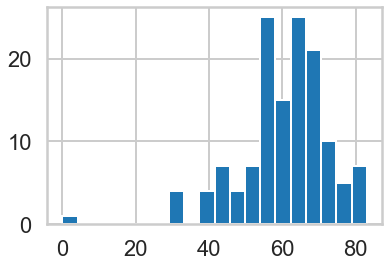

In [161]:
df_betas_ta.Age.hist(bins=20)
plt.show()